# Import libraries

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
from pybaseball import batting_stats

In [5]:
# Batting Stats , qual is the number of players appearences 
batting = batting_stats(2007,2022, qual=200)
batting

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,...,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
2,15640,2022,Aaron Judge,NYY,30,157,570,696,177,87,...,118.4,246,0.609,404,0.169,0.287,NaN,NaN,NaN,11.2
6,13611,2018,Mookie Betts,BOS,25,136,520,614,180,96,...,110.6,217,0.500,434,0.220,0.270,NaN,NaN,NaN,10.4
46,10155,2013,Mike Trout,LAA,21,157,589,716,190,115,...,NaN,0,NaN,0,0.200,0.266,NaN,NaN,NaN,10.2
104,10155,2012,Mike Trout,LAA,20,139,559,639,182,117,...,NaN,0,NaN,0,0.221,0.293,NaN,NaN,NaN,10.1
119,9166,2012,Buster Posey,SFG,25,148,530,610,178,114,...,NaN,0,NaN,0,0.190,0.251,NaN,NaN,NaN,10.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5198,1698,2010,Gerald Laird,DET,30,89,270,299,56,40,...,NaN,0,NaN,0,0.166,0.252,NaN,NaN,NaN,-2.4
5368,9362,2010,Adam Moore,SEA,26,60,205,218,40,30,...,NaN,0,NaN,0,0.181,0.325,NaN,NaN,NaN,-2.4
5330,9272,2018,Chris Davis,BAL,32,128,470,522,79,51,...,111.8,113,0.401,282,0.174,0.316,NaN,NaN,NaN,-3.1
5027,319,2011,Adam Dunn,CHW,31,122,415,496,66,39,...,NaN,0,NaN,0,0.169,0.295,NaN,NaN,NaN,-2.9


In [13]:
# Export DataFrame to csv
batting.to_csv('../static/data/Raw_Data/batting_07_22.csv', index=False)

In [14]:
# Drop players with only 1 season of data 
batting = batting.groupby("IDfg", group_keys=False).filter(lambda x: x.shape[0]>1)

In [15]:
batting

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,...,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR,Next_BsR
3693,1,2007,Alfredo Amezaga,FLA,29,133,400,448,105,80,...,0,NaN,0,0.175,0.227,NaN,NaN,NaN,2.0,2.4
3889,1,2008,Alfredo Amezaga,FLA,30,125,311,337,82,61,...,0,NaN,0,0.178,0.244,NaN,NaN,NaN,1.2,NaN
1351,2,2007,Garret Anderson,LAA,35,108,417,450,124,76,...,0,NaN,0,0.155,0.246,NaN,NaN,NaN,1.4,-2.4
2396,2,2008,Garret Anderson,LAA,36,145,557,593,163,118,...,0,NaN,0,0.175,0.258,NaN,NaN,NaN,1.4,-0.2
3641,2,2009,Garret Anderson,ATL,37,135,496,534,133,93,...,0,NaN,0,0.190,0.274,NaN,NaN,NaN,-1.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4490,24655,2022,Owen Miller,CLE,25,130,424,472,103,70,...,106,0.312,340,0.188,0.266,NaN,NaN,NaN,-0.1,NaN
3602,26197,2021,Andrew Vaughn,CHW,23,127,417,469,98,61,...,149,0.464,321,0.185,0.285,NaN,NaN,NaN,0.2,-3.2
2421,26197,2022,Andrew Vaughn,CHW,24,134,510,555,138,92,...,203,0.484,419,0.201,0.291,NaN,NaN,NaN,0.5,NaN
4983,27506,2021,Ha-seong Kim,SDP,25,117,267,298,54,32,...,64,0.318,201,0.216,0.303,NaN,NaN,NaN,0.6,1.9


In [16]:
# Write a function that takes BsR number from a player's season to insert in Next_BsR column
def next_season(player):
    player = player.sort_values("Season")
    player["Next_BsR"] = player["BsR"].shift(-1)
    return player

batting = batting.groupby("IDfg", group_keys=False).apply(next_season)

In [17]:
# Show the next BsR each player in a DF 
# Missing values are for some seasons with no data (some players could not have played in these seasons)
bsr_df=batting[['Name','Season','BsR','Next_BsR']]
bsr_df

,Name,Season,BsR,Next_BsR
3693,Alfredo Amezaga,2007,0.9,2.4
3889,Alfredo Amezaga,2008,2.4,NaN
1351,Garret Anderson,2007,0.2,-2.4
2396,Garret Anderson,2008,-2.4,-0.2
3641,Garret Anderson,2009,-0.2,NaN
...,...,...,...,...
4490,Owen Miller,2022,1.0,NaN
3602,Andrew Vaughn,2021,-3.6,-3.2
2421,Andrew Vaughn,2022,-3.2,NaN
4983,Ha-seong Kim,2021,1.4,1.9


## Cleaning Data

In [18]:
# Check null values
null_data=batting.isnull().sum()
null_data

IDfg           0
Season         0
Name           0
Team           0
Age            0
            ... 
xBA         5090
xSLG        5090
xwOBA       5090
L-WAR          0
Next_BsR     963
Length: 321, dtype: int64

In [19]:
# List columns with no missing values 
complete_cols=list(batting.columns[null_data == 0])
batting = batting[complete_cols + ["Next_BsR"]].copy()

In [20]:
# Create a clean DataFrame with complete columns and Next_BsR column
batting

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,...,Soft%+,Med%+,Hard%+,Barrels,HardHit,Events,CStr%,CSW%,L-WAR,Next_BsR
3693,1,2007,Alfredo Amezaga,FLA,29,133,400,448,105,80,...,109,113,75,0,0,0,0.175,0.227,2.0,2.4
3889,1,2008,Alfredo Amezaga,FLA,30,125,311,337,82,61,...,123,111,64,0,0,0,0.178,0.244,1.2,NaN
1351,2,2007,Garret Anderson,LAA,35,108,417,450,124,76,...,104,93,109,0,0,0,0.155,0.246,1.4,-2.4
2396,2,2008,Garret Anderson,LAA,36,145,557,593,163,118,...,94,103,97,0,0,0,0.175,0.258,1.4,-0.2
3641,2,2009,Garret Anderson,ATL,37,135,496,534,133,93,...,86,104,100,0,0,0,0.190,0.274,-1.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4490,24655,2022,Owen Miller,CLE,25,130,424,472,103,70,...,131,100,83,12,106,340,0.188,0.266,-0.1,NaN
3602,26197,2021,Andrew Vaughn,CHW,23,127,417,469,98,61,...,84,99,110,35,149,321,0.185,0.285,0.2,-3.2
2421,26197,2022,Andrew Vaughn,CHW,24,134,510,555,138,92,...,94,100,104,33,203,419,0.201,0.291,0.5,NaN
4983,27506,2021,Ha-seong Kim,SDP,25,117,267,298,54,32,...,137,96,88,9,64,201,0.216,0.303,0.6,1.9


### Drop and Dummify all of the categorical variables 

In [21]:
# Find columns with object data type
batting.dtypes[batting.dtypes == 'object']

Name       object
Team       object
Dol        object
Age Rng    object
dtype: object

In [22]:
# Drop 'Dol' (Dollar value of player) and 'Age Rng' (Player's age range during a season) 
batting = batting.drop(['Dol','Age Rng'], axis = 1, inplace = False)

In [23]:
# Assign each team name to number 
batting["team_code"] = batting["Team"].astype("category").cat.codes

In [24]:
# Copy batting data 
batting_full = batting.copy()

# Drop Nan Values from 'Next_BsR'
batting = batting.dropna().copy()

In [25]:
batting

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,...,Med%+,Hard%+,Barrels,HardHit,Events,CStr%,CSW%,L-WAR,Next_BsR,team_code
3693,1,2007,Alfredo Amezaga,FLA,29,133,400,448,105,80,...,113,75,0,0,0,0.175,0.227,2.0,2.4,11
1351,2,2007,Garret Anderson,LAA,35,108,417,450,124,76,...,93,109,0,0,0,0.155,0.246,1.4,-2.4,14
2396,2,2008,Garret Anderson,LAA,36,145,557,593,163,118,...,103,97,0,0,0,0.175,0.258,1.4,-0.2,14
2214,10,2007,David Eckstein,STL,32,117,434,484,134,108,...,108,71,0,0,0,0.210,0.236,0.7,-1.1,27
3172,10,2008,David Eckstein,- - -,33,94,324,376,86,63,...,105,69,0,0,0,0.240,0.273,-0.1,0.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,23667,2021,Wander Franco,TBR,20,70,281,308,81,51,...,106,90,12,92,245,0.143,0.217,2.5,4.0,29
4387,24618,2021,Ryan Jeffers,MIN,24,85,267,293,53,28,...,88,123,23,70,159,0.172,0.316,0.7,-1.3,18
5321,24655,2021,Owen Miller,CLE,24,60,191,202,39,27,...,111,90,8,45,138,0.180,0.296,-1.1,1.0,8
3602,26197,2021,Andrew Vaughn,CHW,23,127,417,469,98,61,...,99,110,35,149,321,0.185,0.285,0.2,-3.2,6


In [26]:
# Remove some columns 
removed_columns = ["Next_BsR", "Name", "Team", "IDfg", "Season"]
selected_columns = batting.columns[~batting.columns.isin(removed_columns)]

## Machine Learning Model to predict next BsR for batters

In [27]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import TimeSeriesSplit

# Initialize Ridge Regression Model
ridge = Ridge(alpha=1)

split = TimeSeriesSplit(n_splits=3)

# Go over the features to find the best one until it selects 20
sfs = SequentialFeatureSelector(ridge, 
                                n_features_to_select=20, 
                                direction="forward",
                                cv=split,
                                n_jobs=8
                               )

In [28]:
X_train = batting[selected_columns]
y_train = batting["Next_BsR"]

# Scale the data 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
batting.loc[:,selected_columns] = scaler.fit_transform(X_train)

In [29]:
# Fit the data 
sfs.fit(X_train,y_train)

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                          estimator=Ridge(alpha=1), n_features_to_select=20,
                          n_jobs=8)

In [30]:
# sfs.get_support() returns True to each column we want to select
sfs.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,

In [31]:
# Assign sfs to a variable called predictors
# These are the 20 columns selected by our model
predictors = list(selected_columns[sfs.get_support()])
predictors

['Age',
 'G',
 'GDP',
 'SB',
 'CS',
 'BB/K',
 'IFH%',
 'Spd',
 'WPA',
 'Zone%',
 'BsR',
 'vSL (sc)',
 'CH-X (sc)',
 'CH-Z (sc)',
 'wCH/C (sc)',
 'SI-X (pi)',
 'O-Swing% (pi)',
 'Pull%+',
 'Hard%+',
 'CSW%']

In [42]:
# All the seasons'years 
years = sorted(batting["Season"].unique())
years

[2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [51]:
def backtest(data, model, predictors, start=1, step=1):
    all_predictions = []
    
    years = sorted(data["Season"].unique())
    
    for i in range(start, len(years), step):
        current_year = years[i]
        
        # Train data is all years before current_year
        train = data[data["Season"] < current_year]
        
        # Test data is the current_year
        test = data[data["Season"] == current_year]
        
        model.fit(train[predictors], train["Next_BsR"])
        
        # Generate predictions on test set
        y_preds = model.predict(test[predictors])
        y_preds = pd.Series(y_preds, index=test.index)
        
        # Concat predictions with actual 
        combined = pd.concat([test["Next_BsR"], y_preds], axis=1)
        combined.columns = ["actual", "prediction"]
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [52]:
model_pred = backtest(batting, ridge, predictors)
model_pred

,actual,prediction
2396,-0.2,-1.537147
3172,0.6,-1.942196
545,-0.7,-3.150864
3828,0.9,0.572630
2295,-7.1,-6.726809
...,...,...
1341,4.0,2.263106
4387,-1.3,-0.789480
5321,1.0,-0.919374
3602,-3.2,-2.090227


## Caculate the accuracy

In [53]:
import sklearn.metrics as sm
y_test= model_pred["actual"]
y_test_pred = model_pred["prediction"]

print("Mean absolute error (MAE) =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error (MSE) =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Square root of Mean squared error (RMSE) =", round(np.sqrt(sm.mean_squared_error(y_test, y_test_pred)), 2))
print("Median absolute error (MAE) =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error (MAE) = 1.93
Mean squared error (MSE) = 6.23
Square root of Mean squared error (RMSE) = 2.5
Median absolute error (MAE) = 1.53
Explain variance score = 0.42
R2 score = 0.42


In [54]:
batting['Next_BsR'].describe()

count    4127.000000
mean       -0.058347
std         3.307774
min       -12.600000
25%        -2.000000
50%        -0.200000
75%         1.800000
max        14.100000
Name: Next_BsR, dtype: float64

std = 3.36

RMSE= 2.538121211104919 < std 
But close to std. Not a perfect prediction


In [55]:
merged = model_pred.merge(batting, left_index=True, right_index=True)
merged["diff"] = (model_pred["actual"] - model_pred["prediction"]).abs()
next_BsR=merged[["IDfg", "Season", "Name", "BsR", "Next_BsR", "diff","prediction"]].sort_values(["diff"])
next_BsR.head(10)

,IDfg,Season,Name,BsR,Next_BsR,diff,prediction
3444,766,2009,Orlando Cabrera,0.546468,-0.7,0.000909,-0.700909
1586,3057,2016,Mike Napoli,0.267658,-2.1,0.001282,-2.098718
338,19251,2019,Pete Alonso,0.386617,-2.0,0.001984,-2.001984
439,5361,2018,Freddie Freeman,0.516729,-0.1,0.002267,-0.102267
952,7304,2021,Salvador Perez,0.438662,-3.2,0.002900,-3.197100
69,1744,2012,Miguel Cabrera,0.189591,-6.0,0.003914,-5.996086
2196,13593,2016,Jose Peraza,0.501859,2.8,0.004001,2.804001
824,9166,2015,Buster Posey,0.405204,-3.3,0.004025,-3.304025
4593,11489,2016,Michael A. Taylor,0.553903,3.1,0.006641,3.093359
1578,3353,2017,Matt Joyce,0.531599,-0.3,0.007483,-0.307483


In [56]:
next_BsR.tail(10)

,IDfg,Season,Name,BsR,Next_BsR,diff,prediction
2336,1286,2008,Michael Young,0.546468,-8.7,8.421641,-0.278359
2686,8709,2012,Elvis Andrus,0.520446,10.9,8.439123,2.460877
1532,778,2009,Vladimir Guerrero,0.371747,-12.4,8.490124,-3.909876
3935,4727,2012,Jacoby Ellsbury,0.568773,10.7,8.524661,2.175339
5039,6387,2008,Michael Bourn,0.717472,13.7,8.541754,5.158246
3231,4940,2011,Jason Heyward,0.539033,9.5,8.573277,0.926723
1463,3312,2012,Martin Prado,0.524164,-8.8,8.858637,0.058637
277,1679,2008,Chase Utley,0.736059,12.3,10.285534,2.014466
188,13510,2017,Jose Ramirez,0.468401,12.0,10.629671,1.370329
2077,9241,2020,Starling Marte,0.546468,12.3,10.832613,1.467387


We can see that for some players the prediction was so closed to the actual Next_WAR while for others the model is predicting a value so far from actual value.

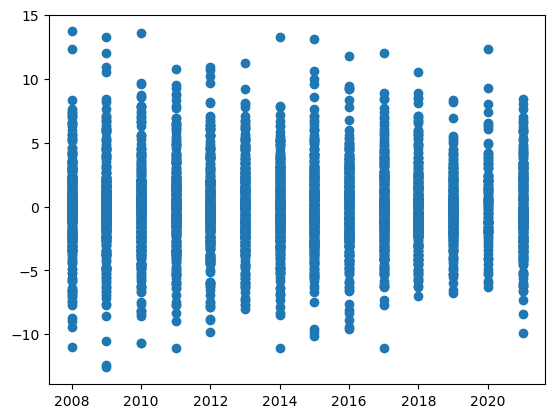

In [57]:
import matplotlib.pyplot as plt 

plt.scatter(next_BsR["Season"],next_BsR["Next_BsR"])
plt.show()

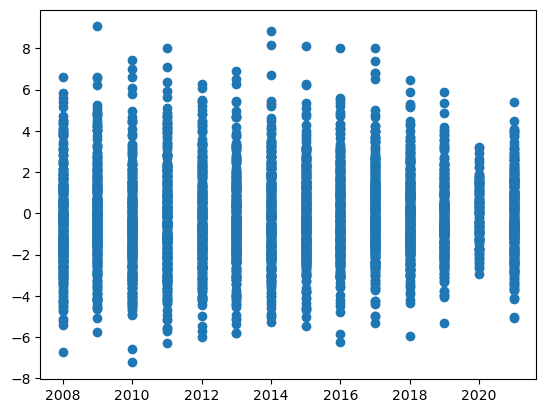

In [58]:
plt.scatter(next_BsR["Season"],next_BsR["prediction"])
plt.show()
    